In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('casestudy.csv')

In [4]:
df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [5]:
################# Q.1 #############################
current_year_revenue = df[df['year'] == 2017]['net_revenue'].sum()
print('current year revenue =', current_year_revenue )

current year revenue = 31417495.030000016


In [6]:
################ Q.2 ####################

In [7]:
df.sort_values('year')

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
154189,154189,dmwhwcevtw@gmail.com,68.56,2015
154190,154190,aufzyxucjw@gmail.com,180.88,2015
154191,154191,eciohbmgyp@gmail.com,216.81,2015
154192,154192,eqfchvvoak@gmail.com,186.75,2015
...,...,...,...,...
519273,519273,noaniodrmk@gmail.com,177.29,2017
519274,519274,zwnejhirja@gmail.com,139.01,2017
519275,519275,jgovbltxmu@gmail.com,131.82,2017
519277,519277,pzytmjawlp@gmail.com,11.15,2017


In [8]:
df['Occurance'] = np.where(~df['customer_email'].duplicated(),'New','Existing')

In [9]:
df

,Unnamed: 0,customer_email,net_revenue,year,Occurance
0,0,nhknapwsbx@gmail.com,249.92,2015,New
1,1,joiuzbvcpn@gmail.com,87.61,2015,New
2,2,ukkjctepxt@gmail.com,168.38,2015,New
3,3,gykatilzrt@gmail.com,62.40,2015,New
4,4,mmsgsrtxah@gmail.com,43.08,2015,New
...,...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017,New
685923,685923,pjodiifjop@gmail.com,133.03,2017,New
685924,685924,appaplmgko@gmail.com,200.98,2017,New
685925,685925,wvkpmwsgck@gmail.com,235.35,2017,New


In [10]:
df_newonly = df[df['Occurance']=='New']

In [11]:
df_newonly.groupby('year')['net_revenue'].sum()

year
2015    29036749.19
2016    18245491.01
2017    28676607.64
Name: net_revenue, dtype: float64

In [12]:
print('\033[1m','Total New Customer Revenue = ', str(round(df_newonly['net_revenue'].sum(),2)))

 Total New Customer Revenue =  75958847.84


In [13]:
############### Q.3 ##############################

In [14]:
df_existingCust = df[df['Occurance']== 'Existing']

In [15]:
df_existingCust

,Unnamed: 0,customer_email,net_revenue,year,Occurance
231302,231302,baiikostmd@gmail.com,142.57,2016,Existing
231303,231303,lfeafnigbu@gmail.com,35.06,2016,Existing
231309,231309,tqxsjlgjpi@gmail.com,33.50,2016,Existing
231310,231310,hxshgpdxtr@gmail.com,217.35,2016,Existing
231318,231318,zvhsssvgor@gmail.com,43.84,2016,Existing
...,...,...,...,...,...
640562,640562,flkeldljhv@gmail.com,180.01,2017,Existing
640568,640568,ecrvkbfunu@gmail.com,205.42,2017,Existing
640571,640571,tpdtoiokyt@gmail.com,242.63,2017,Existing
640580,640580,dcakqgznnm@gmail.com,62.66,2017,Existing


In [16]:
df_existingCust.groupby('year')['net_revenue'].sum()

year
2016    7485452.58
2017    2740887.39
Name: net_revenue, dtype: float64

In [17]:
Existing_Cust_growth = df_existingCust[df_existingCust['year']==2017]['net_revenue'].sum() - df_existingCust[df_existingCust['year']==2016]['net_revenue'].sum()

In [18]:
print('\033[1m','Existing Customer Growth in Current Year =', Existing_Cust_growth)

 Existing Customer Growth in Current Year = -4744565.19



 **Existing customer growth is negative. Revenue from existing customers is reduced compared to last year**

In [19]:
############ Q.4 ##############

In [20]:
yearly_revenue = df.groupby('year')['net_revenue'].sum()

In [21]:
yearly_revenue

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

In [22]:
print('\033[1m','Revenue Lost in Attrition in 2017 =', str(round(df[df['year']==2016]['net_revenue'].sum() -  df[df['year']==2017]['net_revenue'].sum(),2)))
print('\033[1m','Revenue Lost Attrition in 2016 =', str(round(df[df['year']==2015]['net_revenue'].sum() -  df[df['year']==2016]['net_revenue'].sum(),2)))
#print('\033[1m','NO REVENUE LOST IN ATTRItTION IN 2017')

 Revenue Lost in Attrition in 2017 = -5686551.44
 Revenue Lost Attrition in 2016 = 3305805.6


In [23]:
print('\033[1m','Revenue Lost in Existing Customers Attrition_in 2017 =', str(round(df_newonly[df_newonly['year']==2016]['net_revenue'].sum() -  df_existingCust[df_existingCust['year']==2017]['net_revenue'].sum(),2)))
print('\033[1m','Revenue Lost in Existing Custoner Attrition in 2016 =', str(round(df_newonly[df_newonly['year']==2015]['net_revenue'].sum() -  df_existingCust[df_existingCust['year']==2016]['net_revenue'].sum(),2)))

 Revenue Lost in Existing Customers Attrition_in 2017 = 15504603.62
 Revenue Lost in Existing Custoner Attrition in 2016 = 21551296.61


In [24]:
############## Q.5 ################

In [25]:
print('\033[1m','Existing Customer Revenue in Current Year =', str(round(df_existingCust[df_existingCust['year']==2017]['net_revenue'].sum(),2)))

 Existing Customer Revenue in Current Year = 2740887.39


In [ ]:
############ Q.6 ##############

In [26]:
print('\033[1m','Existing Customer Revenue in Prior Year =', df_existingCust[df_existingCust['year']==2016]['net_revenue'].sum(), 'USD')

 Existing Customer Revenue in Prior Year = 7485452.58 USD


In [ ]:
########## Q.7 ###########3

In [27]:
print('\033[1m','Total Customers in Current Year =', df[df['year']==2017]['customer_email'].count())

 Total Customers in Current Year = 249987


In [28]:
########### Q.8 ##############3

In [29]:
print('\033[1m','Total Customers in Previous Year =', df[df['year']==2016]['customer_email'].count())

 Total Customers in Previous Year = 204646


In [30]:
########## Q.9 ###############

In [31]:
print('New Customers =', df_newonly['customer_email'].count())

New Customers = 604618


In [32]:
print('\033[1m','New Customers in Current Year =', df_newonly[df_newonly['year']==2017]['customer_email'].count())

 New Customers in Current Year = 228262


In [33]:
############ Q.10 ##################

In [34]:
#Existing_Customers_2016 = df_existingCust[df_existingCust['year']==2016]['customer_email'].count() 
#Existing_Customers_2016 

In [35]:
df_newonly[df_newonly['year']==2015]['customer_email'].count()

231294

In [36]:
df_existingCust[df_existingCust['year']==2016]['customer_email'].count() 

59584

In [37]:
 Lost_Customers_2016 = df[df['year']==2015]['customer_email'].count() - df_existingCust[df_existingCust['year']==2016]['customer_email'].count() 
 print('\033[1m'+'Lost Customers in 2016 =', Lost_Customers_2016)

Lost Customers in 2016 = 171710


In [38]:
Lost_Customers_2017 = df[df['year']==2016]['customer_email'].count() - df_existingCust[df_existingCust['year']==2017]['customer_email'].count() 
print('\033[1m','Lost Customers in 2017 =', Lost_Customers_2017)

 Lost Customers in 2017 = 182921


In [39]:
print('\033[1m','Total Lost Customers =', Lost_Customers_2016 + Lost_Customers_2017)

 Total Lost Customers = 354631


In [40]:
########### Plots ##############3

Text(0, 0.5, 'Customers')

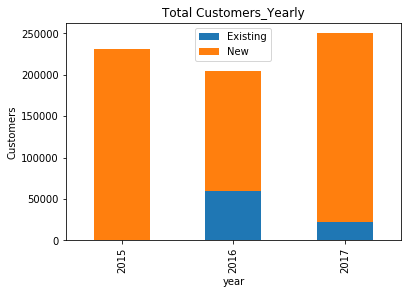

In [41]:
Total_Cust_Yearly=df.groupby(['year', 'Occurance'])['customer_email'].size().unstack().plot(kind='bar', stacked = True)
Total_Cust_Yearly.set_title('Total Customers_Yearly')
Total_Cust_Yearly.legend( loc='upper center', fancybox=True,) #bbox_to_anchor=(0.5, 1.05),
Total_Cust_Yearly.set_xlabel('year')
Total_Cust_Yearly.set_ylabel('Customers')

Text(0, 0.5, 'Net Revenue')

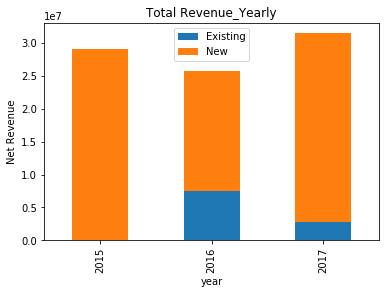

In [42]:
Total_yearly_revenue_ = df.groupby(['year', 'Occurance'])['net_revenue'].sum().unstack().plot(kind='bar',stacked=True)
Total_yearly_revenue_.set_title('Total Revenue_Yearly')
Total_yearly_revenue_.legend( loc='upper center', fancybox=True,) #bbox_to_anchor=(0.5, 1.05),
Total_yearly_revenue_.set_xlabel('year')
Total_yearly_revenue_.set_ylabel('Net Revenue')

 Customer retention and revenue from existing customers deopped in 2017. 


In [43]:
Percent_of_customers_retained_in_2016 = ((df[df['year']==2015]['customer_email'].count() - Lost_Customers_2016)/df_newonly[df_newonly['year']==2015]['customer_email'].count())*100
Percent_of_customers_retained_in_2016 = str(round(Percent_of_customers_retained_in_2016, 2))
print('\033[1m','Percent of existing customers retained in 2016=',Percent_of_customers_retained_in_2016,'%')

 Percent of existing customers retained in 2016= 25.76 %


In [44]:
Percent_of_customers_retained_in_2017 = ((df[df['year']==2016]['customer_email'].count() - Lost_Customers_2017)/df[df['year']==2016]['customer_email'].count())*100
Percent_of_customers_retained_in_2017 = str(round(Percent_of_customers_retained_in_2017, 2))
print('\033[1m','Percent of existing customers retained in 2017=',Percent_of_customers_retained_in_2017,'%')

 Percent of existing customers retained in 2017= 10.62 %


In [ ]:
## It is observed in bar plot for customer that the company could retain around 25% in the next year 2016 
##and in 2017 the company retained 10% customers but however made more total number of customers than year 2015 & 2016